In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ds_path = os.path.join(os.getcwd(),'Datasets','Life Expectancy Data.csv')
data = pd.read_csv(ds_path)
data = data.dropna()

<AxesSubplot:>

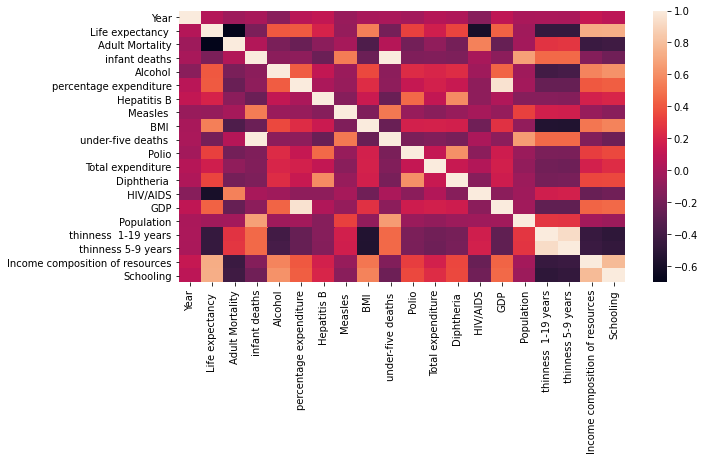

In [3]:
corr = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>

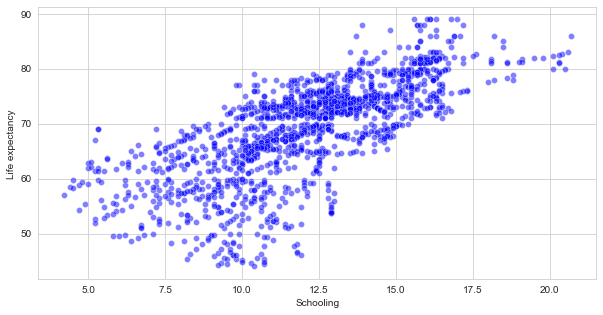

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Schooling', y='Life expectancy ', alpha=0.5, color='b')

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Linear Regression Model

Defining a loss function:
- mean squared error = the sum of all (the differences between actual y and predicted y) squared divided by the number of y values
- aim is to find the values of m (gradient) and c (y-intercept) that yield the lowest total mean squared error

In [6]:
def loss_function(m, c, data):
    
    total_error = 0
    
    # Loop through each set of data points and calculate the squared error (y-expected_y) for that given value of x
    # Sum all squared errors to give total error
    for i in range(len(data)):
        x = data.iloc[i]['Schooling']
        y = data.iloc[i]['Life expectancy ']
        total_error += (y - (m*x+c))**2
    
    # Calculate mean squared error - divide total error by number of data points 
    mean_squared_error = total_error/len(data)
    return mean_squared_error

Defining a gradient descent function:
- gradient descent = the derivative of our loss function
- aim is to know, for any given value of m and c, if the loss function is increasing or decreasing
- we then adjust our m and c inputs by the learning rate in the decreasing direction

In [7]:
def gradient_descent(m, c, data, lr):
    # Setting starting points
    m_gradient = 0
    c_gradient = 0
    
    n = len(data)
    
    # Calculating mean squared error (value of the loss function)
    mean_squared_error = loss_function(m, c, data)
    
    # Calculating the derivative of the loss function with respect to gradient values and y-intercept values
    for i in range(n):
        x = data.iloc[i]['Schooling']
        y = data.iloc[i]['Life expectancy ']
        
        # 1st Derivative of loss function ((y - (mx+c))**2)/n - tells us if the gradient is increasing or decreasing
        m_gradient += -(2/n)* x * (y - (m * x + c))
        c_gradient += -(2/n)* (y - (m * x + c))
    
    # Subtracting the first derivative * learning rate from current gradient and y-intercept values
    # When loss function is smaller, we take smaller steps and vice versa, to find the lowest value
    m_new = m - m_gradient * lr
    c_new = c - c_gradient * lr
    
    return m_new, c_new, mean_squared_error

In [8]:
# Running the model

# staring inputs
m = 0
c = 0

# learning rate and number of trials (steps towards optimum value)
lr = 0.001
trials = 300

# tracking the values of m and c tested and the corresponding values of the loss function to visualise
gradient_values = []
yint_values = []
lf = []
for i in range(trials):
    if i % 100 == 0:
        print(f"Trials: {i}")
    m, c, mse= gradient_descent(m, c, data, lr)
    gradient_values.append(m)
    yint_values.append(c)
    lf.append(mse)

Trials: 0
Trials: 100
Trials: 200


In [9]:
lf_dict = {'Gradients': gradient_values, 'Y Intercepts':yint_values, 'Mean Squared Error':lf}
lf_df = pd.DataFrame(lf_dict)
lf_df.head()

,Gradients,Y Intercepts,Mean Squared Error
0,1.715637,0.138605,4880.146762
1,2.897091,0.235345,2378.658552
2,3.710656,0.303254,1192.181583
3,4.270856,0.351307,629.420813
4,4.656564,0.385684,362.491658


Text(0.5, 0, 'Y Intercepts')

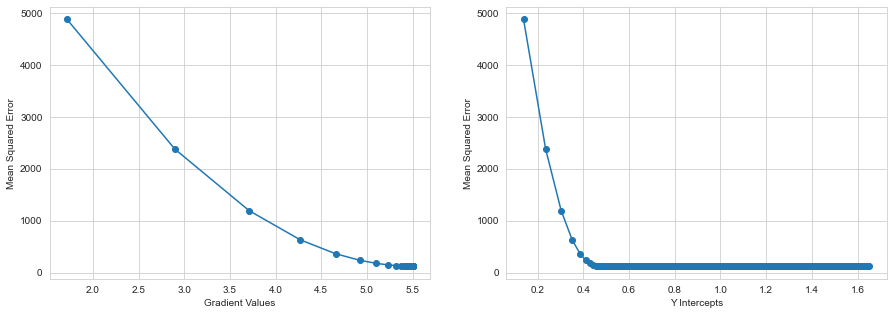

In [10]:
plt.figure(figsize=(15,5))

# Plotting loss function (mean squared error values) against gradient values 
plt.subplot(1,2,1)
plt.plot(lf_df['Gradients'], lf_df['Mean Squared Error'], marker = 'o')
plt.xlabel('Gradient Values')
plt.ylabel('Mean Squared Error')

# Plotting loss function (mean squared error values) against gradient values 
plt.subplot(1,2,2)
plt.plot(lf_df['Y Intercepts'], lf_df['Mean Squared Error'], marker= 'o')
plt.ylabel('Mean Squared Error')
plt.xlabel('Y Intercepts')

In [11]:
print(m,c)

5.416636750687753 1.6514162996962074


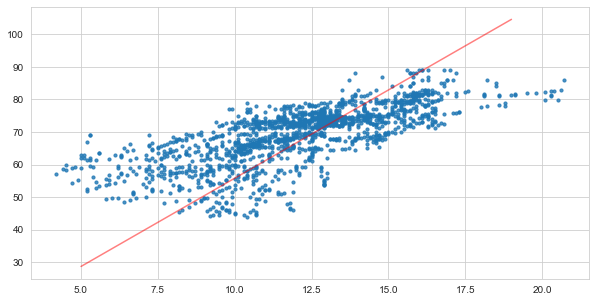

5.416636750687753 1.6514162996962074


In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,5))
plt.plot(range(5,20), [m * x + c for x in range(5,20)], color='red', alpha=0.5)
plt.scatter(data['Schooling'],data['Life expectancy '], alpha=0.8, s=10)


plt.show()
print(m, c)

In [13]:
# next steps
# 1 - plotting the loss function (mean squared error) against y-intercept and gradient values
# 2 - comparing the impact of learning rate and number of trials on minimum mean squared error value found
# 3 - comparing learning rate and number of trials distributions of mse values and m and c values tried